In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [ ]:
cube = np.arange(1,7)
n = 100
result = np.ndarray(shape=n)
for i in range(n):
  result[i] = random.choice(cube)

In [ ]:
result = result.astype(int)

<Axes: ylabel='count'>

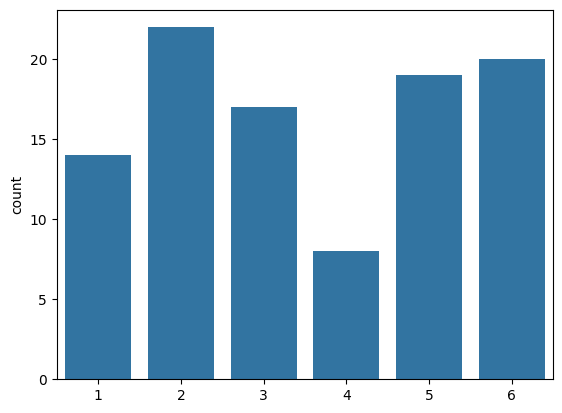

In [ ]:
sns.countplot(x=result)

<Axes: >

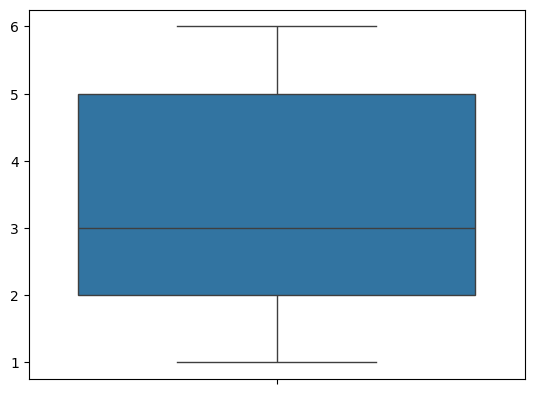

In [ ]:
sns.boxplot(result)

# Рассчитаем T-критерий
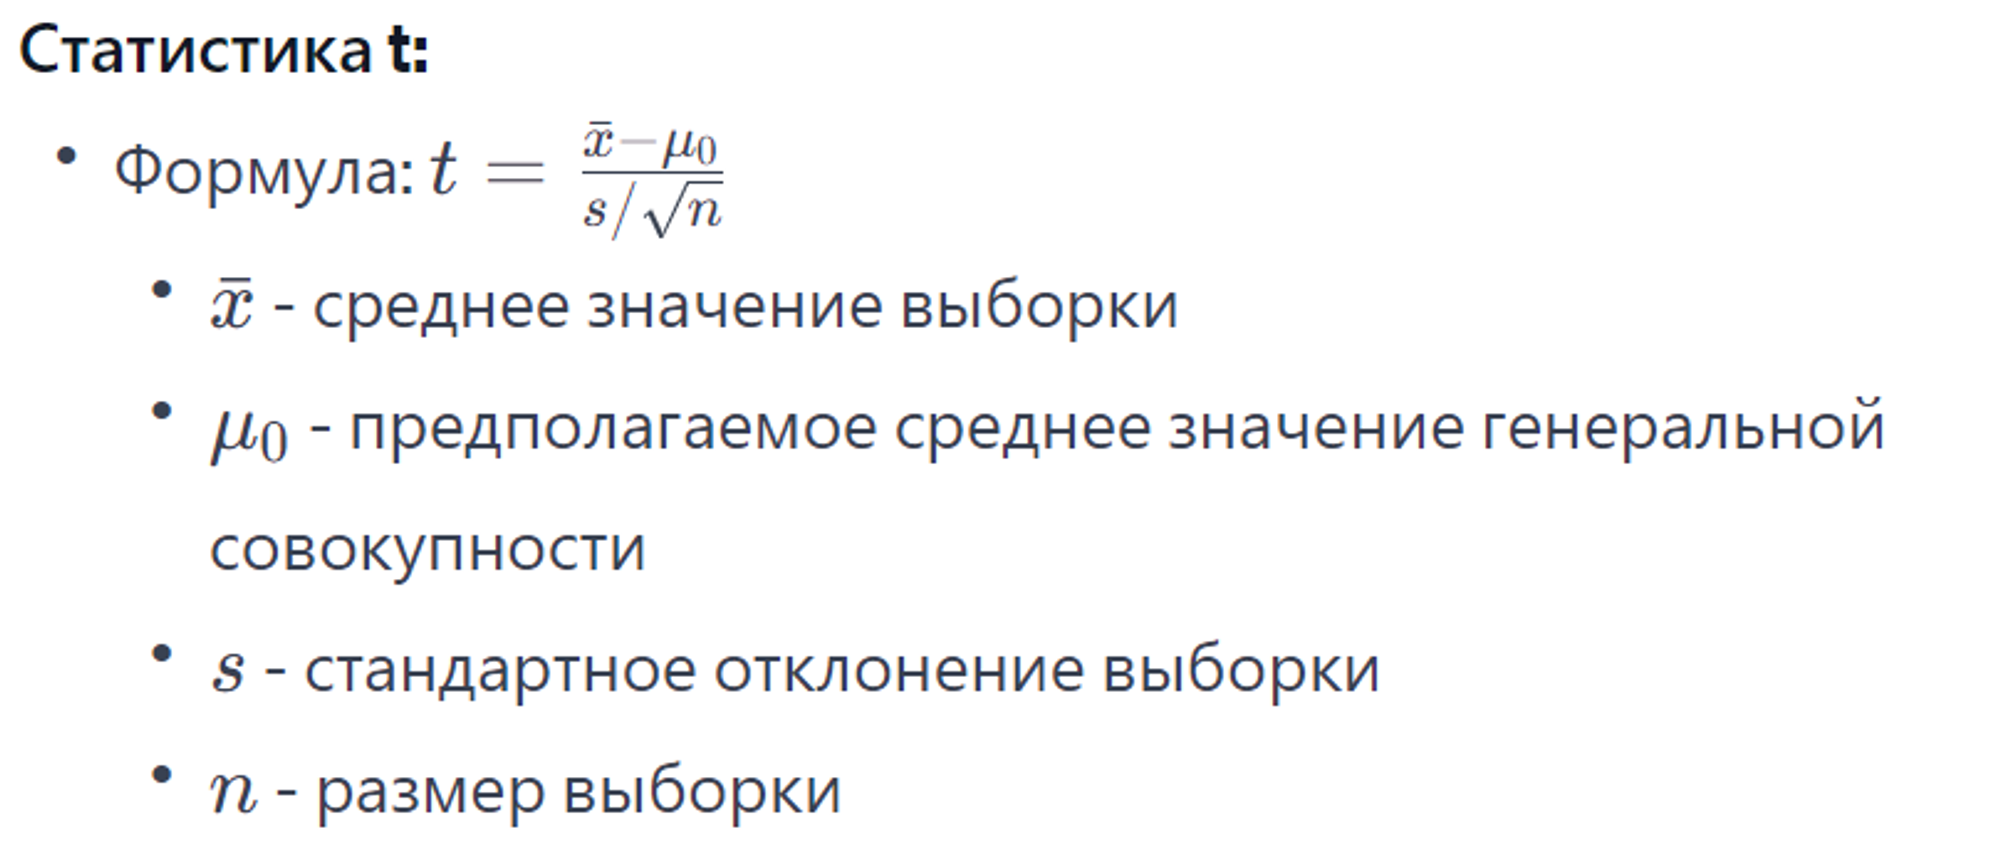

In [ ]:
avg = result.mean()
u0 = 3.5
std = result.std()
avg, std

(3.56, 1.7624982269494627)

In [ ]:
t = (avg - u0) / (std / n**0.5)
t

0.3404258743785986

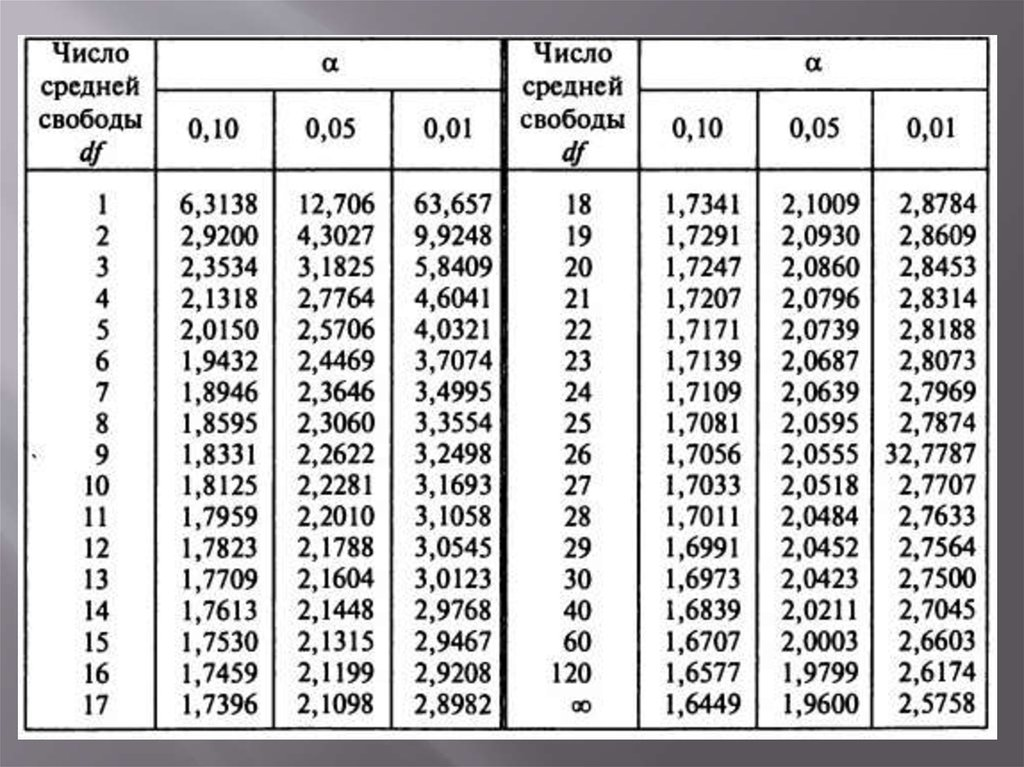

Изначальная гипотеза верна!

#Распределение T-критерия
Теперь посмотрим на распределение t-значения при разном количестве эесперементов.

In [ ]:
def t_value(n_exp):
  t_list = []
  for _ in range(100):
      x_list = np.ndarray(shape=n_exp)
      for i in range(n_exp):
          x_list[i] = random.choice(cube)
      avg = x_list.mean()
      u0 = 3.5
      s = np.std(x_list)
      n = len(x_list)
      if s != 0:
          t = (avg - u0) / (s / n**0.5)
          t_list.append(t)
  sns.histplot(t_list)

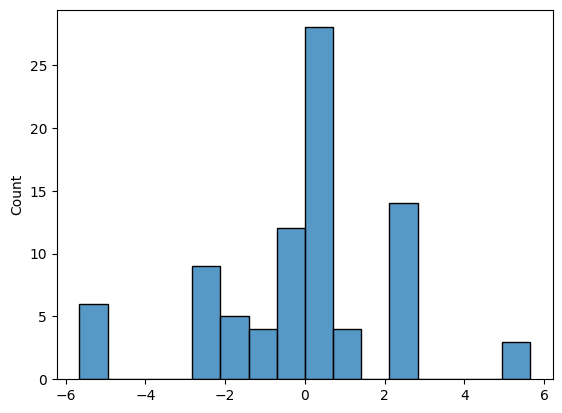

In [ ]:
t_value(2) # 100 раз провели эксперимент, в котором подбрасывали монетку 2 раза и на основе данных считали t-значение

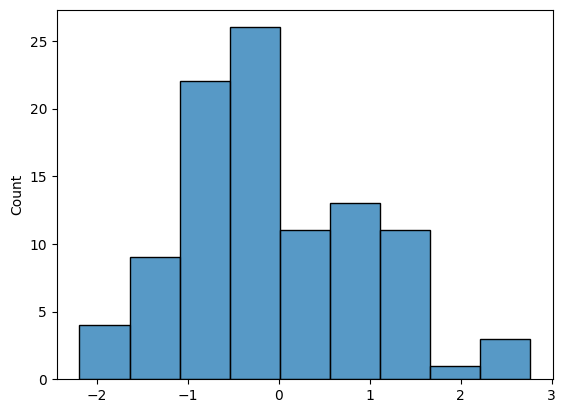

In [ ]:
t_value(100) # 100 раз провели эксперимент, в котором подбрасывали монетку 100 раз и на основе данных считали t-значение

С увеличением степеней свободы распределение t-статистики становится все ближе к стандартному нормальному распределению.

При малых размерах выборки распределение t-статистики более пологое и имеет большие хвосты, чем стандартное нормальное распределение.

#Задачи


1.   Вес популяции женщин известен по исследованию прошлого года и составляет в среднем 65 кг. Новое исследование, проведенное на выборке из 30 женщин, показало средний вес 68 кг. При условии, что стандартное отклонение популяции составляет 10 кг, проверьте, есть ли статистически значимое различие в весе женщин в новом исследовании. Уровень значимости принять равным 5%.
2.   Известно, что средняя оценка студентов за экзамен по статистике составляет 75 баллов. Преподаватель считает, что его студенты лучше подготовлены и имеют в среднем более высокую оценку. Он взял случайную выборку из 25 студентов и получил среднюю оценку 78. При известном стандартном отклонении оценок, равном 8 баллам, проверьте, подтверждают ли данные выборки его утверждение.
3. Компания утверждает, что среднее время доставки их товаров клиентам составляет 4 дня. Вы взяли случайную выборку из 20 заказов и выяснили, что среднее время доставки в этой выборке составляет 3.5 дня, а стандартное отклонение времени доставки 1.2 дня. Можно ли считать утверждение компании верным на уровне значимости 0.05?



In [ ]:
t_value = (68 - 65)/ (10 * (30 ** 0.5))
critical_value = 2.0425
t_value < critical_value

True

Среднее значение выборки равно предполагаемому среднему значению генеральной совокупности

In [ ]:
t_value = (78 - 75)/ (8 * (25 ** 0.5))
critical_value = 2.0639
t_value < critical_value

True

In [ ]:
t_value = (3.5 - 4)/ (1.2 * (20 ** 0.5))
critical_value = 2.0930
t_value < critical_value, t_value

(True, -0.09316949906249124)

# Двухвыборочные тесты

In [ ]:
from scipy import stats

data1 = [84, 91, 78, 88, 75]
data2 = [69, 74, 72, 88, 70]

t_stat, p_value = stats.ttest_ind(data1, data2)
print(t_stat, p_value)
if p_value < 0.05:
    print("Есть статистически значимые различия между средними значениями выборок.")
else:
    print("Нет статистически значимых различий между средними значениями выборок.")

1.8811581488171725 0.09673304874807478
Нет статистически значимых различий между средними значениями выборок.


In [ ]:
# Пример парных выборок (до и после)
before = [5, 7, 3, 8, 6]
after = [8, 9, 6, 10, 7]

# Парный t-тест для разноповторных измерений с альтернативной гипотезой
t_stat, p_value = stats.ttest_rel(before, after)
print("t-статистика:", t_stat)
print("p-value:", p_value)

t-статистика: -5.879747322073337
p-value: 0.004181072135640301


In [ ]:
# Пример двух независимых выборок
group1 = [30, 25, 27, 31, 26]
group2 = [33, 28, 30, 29, 32]

# t-тест Уэлча для независимых выборок с разными дисперсиями
t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
print("t-статистика:", t_stat)
print("p-value:", p_value)

t-статистика: -1.7529196424044282
p-value: 0.11949771718914884


# Задачи


1.   **Контекст**: Сравнение эффективности двух разных методов изучения иностранного языка в группах с одинаковой вариабельностью (дисперсией) результатов.

Данные:

Группа 1: [40, 42, 45, 38, 41] (Дисперсия: 4)

Группа 2: [35, 37, 33, 36, 34] (Дисперсия: 4)

Задача: Используя тест Стьюдента, проверьте, есть ли статистически значимая разница в эффективности двух методов изучения языка при одинаковой вариабельности результатов.
2.   **Контекст**: Сравнение эффективности двух разных программ обучения в группах с разной вариабельностью результатов.

Данные:

Группа 1: [25, 28, 30, 32, 27] (Дисперсия: 9)

Группа 2: [23, 26, 29, 27, 24] (Дисперсия: 4)

Задача: С помощью теста Уэлча для независимых выборок с неравенством дисперсий, проверьте, есть ли статистически значимая разница в эффективности двух программ обучения при разной вариабельности результатов.
3. **Контекст**: Исследование эффективности нового лекарства для снижения артериального давления.

Данные:

Группа пациентов до приема лекарства: [140, 135, 150, 146, 138]

Группа пациентов после приема лекарства: [130, 125, 135, 132, 128]

Задача: Используя двухвыборочный t-тест, проверьте, есть ли статистически значимое снижение артериального давления после приема лекарства.



In [ ]:
group_1 = [40, 42, 45, 38, 41]
group_2 = [35, 37, 33, 36, 34]

t_stat, p_val = stats.ttest_ind(group_1,group_2)
print("t-статистика:", t_stat)
print("p-value:", p_val)

t-статистика: 4.570700640801813
p-value: 0.001824111410905962


In [ ]:
group_1 = [25, 28, 30, 32, 27]
group_2 = [23, 26, 29, 27, 24]

t_stat, p_val = stats.ttest_ind(group_1,group_2, equal_var=False)
print("t-статистика:", t_stat)
print("p-value:", p_val)

t-статистика: 1.6124515496597087
p-value: 0.14610004257641268


In [ ]:
group_1 = [140, 135, 150, 146, 138]
group_2 = [130, 125, 135, 132, 128]

t_stat, p_val = stats.ttest_rel(group_1,group_2)
print("t-статистика:", t_stat)
print("p-value:", p_val)

t-статистика: 10.596712819579722
p-value: 0.00044886183290093995
